In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
learning_curves = np.load('Results/DefaultExp/learning_curve.npz')
Metrics = np.load('Results/DefaultExp/Metrics.npz')

In [8]:
print(learning_curves['losses_train'], learning_curves['losses_val'])

[0.47518898 0.38921623 0.35201876 0.32973821 0.30705341 0.27206303
 0.2649797  0.25579201 0.24819876 0.24446942 0.22809971 0.22291207
 0.21979273 0.21694053 0.21256307 0.20572308 0.20461496 0.20300172
 0.20188314 0.20105359] [0.40272153 0.37597913 0.31918584 0.29874088 0.30725154 0.26634217
 0.26482647 0.2701084  0.27543311 0.25501962 0.24486904 0.25022402
 0.24432353 0.24437713 0.24577141 0.24364391 0.24384625 0.24432692
 0.24366891 0.24597367]


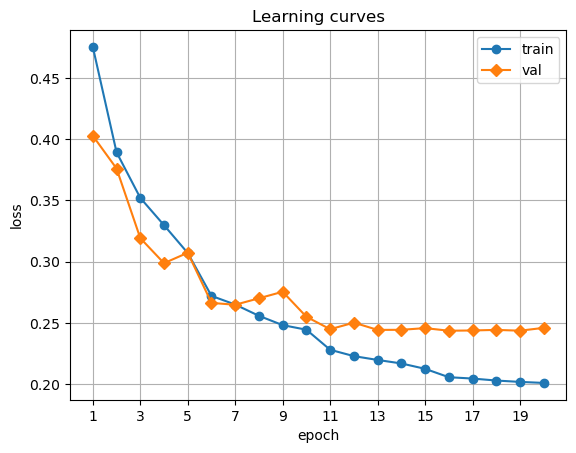

In [9]:
fig = plt.figure()

plt.plot(range(1,21),learning_curves['losses_train'], label='train', marker='o')
plt.plot(range(1,21),learning_curves['losses_val'], label='val', marker = "D")
plt.xlabel('epoch')
plt.xticks(list(range(1,21,2)))
plt.grid(True)
plt.ylabel('loss')
plt.title('Learning curves')
plt.legend()
plt.savefig("Results/DefaultExp/LearningCurve.pdf",format='pdf')
plt.show()

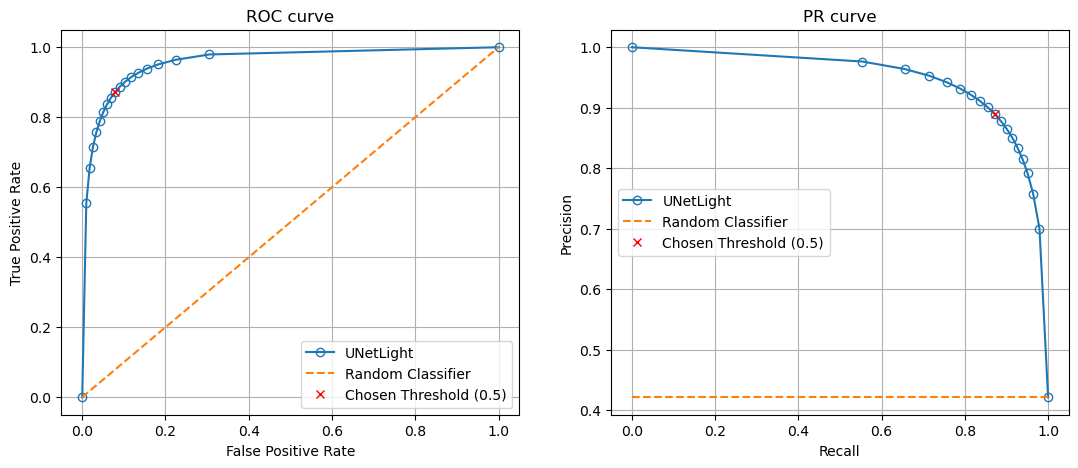

Accuracy  :  0.9003443795561143
Precision :  0.8892860539496196
Recall    :  0.8720310861473259
FPR       :  0.07904195408470083
F1 score  :  0.8805740498030609
IoU score :  0.7866300130420799
Imbalance :  0.4213150879789218


In [10]:
x = len(Metrics['FPR'])//2

fig = plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.plot(Metrics['FPR'], Metrics['TPR'], marker='o', fillstyle='none', label='UNetLight')
plt.plot([0,1],[0,1], '--', fillstyle = "none", label="Random Classifier")
plt.plot(Metrics['FPR'][x], Metrics['TPR'][x], color='red', marker='x', linestyle='', fillstyle='none', label='Chosen Threshold (0.5)')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()

Imbalance = Metrics['Precision'][0]
plt.subplot(1,2,2)
plt.plot(Metrics['Recall'], Metrics['Precision'], marker='o', fillstyle='none', label='UNetLight')
plt.plot([0,1],[Imbalance,Imbalance], '--', fillstyle = "none", label="Random Classifier")
plt.plot(Metrics['Recall'][x], Metrics['Precision'][x], color='red', marker='x', linestyle='', fillstyle='none', label='Chosen Threshold (0.5)')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.grid()

plt.savefig("Results/DefaultExp/ROC_PR_Curve.pdf",format='pdf')
plt.show()

print("Accuracy  : ", Metrics['Accuracy'][x])
print("Precision : ", Metrics['Precision'][x])
print("Recall    : ", Metrics['Recall'][x])
print("FPR       : ", Metrics['FPR'][x])
print("F1 score  : ", Metrics['F1'][x])
print("IoU score : ", Metrics['IoU'][x])
print("Imbalance : ", Imbalance)